In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data_path = ('./feedback-prize-english-language-learning/train.csv')
test_data_path = ('./feedback-prize-english-language-learning/test.csv')

In [3]:
def load_data(path):
    corpus = pd.read_csv(path)
    return corpus

## Data exploration

In [4]:
df = load_data(train_data_path)
df.head(10)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
5,004AC288D833,"Dear Principal,\r\n\r\nOur school should have ...",3.5,4.0,4.0,3.5,3.5,4.0
6,005661280443,Imagine if you could prove other people that y...,3.5,4.0,3.5,3.5,4.0,4.0
7,008DDDDD8E8D,I think it's a good idea for the estudnets to ...,2.5,2.5,2.5,2.5,2.5,2.0
8,009BCCC61C2A,positive attitude is the key to success. I agr...,3.0,3.0,3.5,3.5,3.0,3.0
9,009F4E9310CB,Asking more than one person for and advice hel...,3.0,3.0,3.5,2.5,3.0,2.5


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cohesion,3911.0,3.127077,0.662542,1.0,2.5,3.0,3.5,5.0
syntax,3911.0,3.028254,0.644399,1.0,2.5,3.0,3.5,5.0
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
phraseology,3911.0,3.116850,0.655997,1.0,2.5,3.0,3.5,5.0
grammar,3911.0,3.032856,0.699841,1.0,2.5,3.0,3.5,5.0
conventions,3911.0,3.081053,0.671450,1.0,2.5,3.0,3.5,5.0


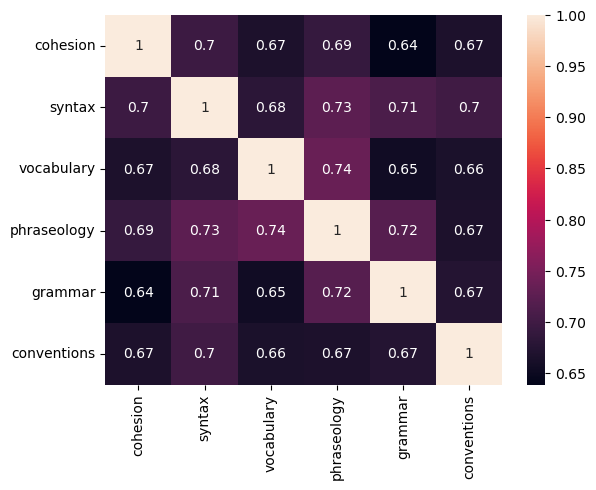

In [6]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [7]:
vocabulary_cohesion = df[['vocabulary', 'cohesion']]
vocabulary_cohesion.describe().T

,count,mean,std,min,25%,50%,75%,max
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
cohesion,3911.0,3.127077,0.662542,1.0,2.5,3.0,3.5,5.0


In [8]:
vocabulary_conventions = df[['vocabulary', 'conventions']]
vocabulary_conventions.describe().T

,count,mean,std,min,25%,50%,75%,max
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
conventions,3911.0,3.081053,0.671450,1.0,2.5,3.0,3.5,5.0


In [9]:
vocabulary_phraseology = df[['vocabulary', 'phraseology']]
vocabulary_phraseology.describe().T

,count,mean,std,min,25%,50%,75%,max
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
phraseology,3911.0,3.116850,0.655997,1.0,2.5,3.0,3.5,5.0


In [10]:
vocabulary_syntax = df[['vocabulary', 'syntax']]
vocabulary_syntax.describe().T

,count,mean,std,min,25%,50%,75%,max
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
syntax,3911.0,3.028254,0.644399,1.0,2.5,3.0,3.5,5.0


In [11]:
vocabulary_grammar = df[['vocabulary', 'grammar']]
vocabulary_grammar.describe().T

,count,mean,std,min,25%,50%,75%,max
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
grammar,3911.0,3.032856,0.699841,1.0,2.5,3.0,3.5,5.0


In [12]:
grammar_syntax = df[['grammar', 'phraseology']]
grammar_syntax.describe().T

,count,mean,std,min,25%,50%,75%,max
grammar,3911.0,3.032856,0.699841,1.0,2.5,3.0,3.5,5.0
phraseology,3911.0,3.116850,0.655997,1.0,2.5,3.0,3.5,5.0


## Data Visualization

/tmp/ipykernel_32062/2537282000.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['vocabulary'], color='blue')


Text(0, 0.5, 'Density')

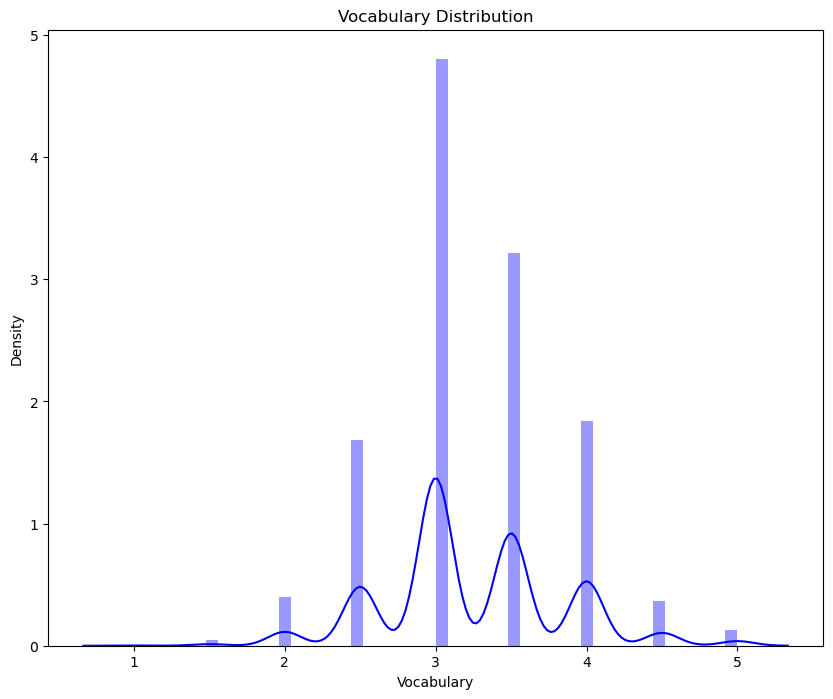

In [13]:
fig = plt.figure(figsize=(10,8))
sns.distplot(df['vocabulary'], color='blue')
plt.title('Vocabulary Distribution')
plt.xlabel('Vocabulary')
plt.ylabel('Density')

/tmp/ipykernel_32062/3588297884.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['phraseology'], color='blue')


Text(0, 0.5, 'Density')

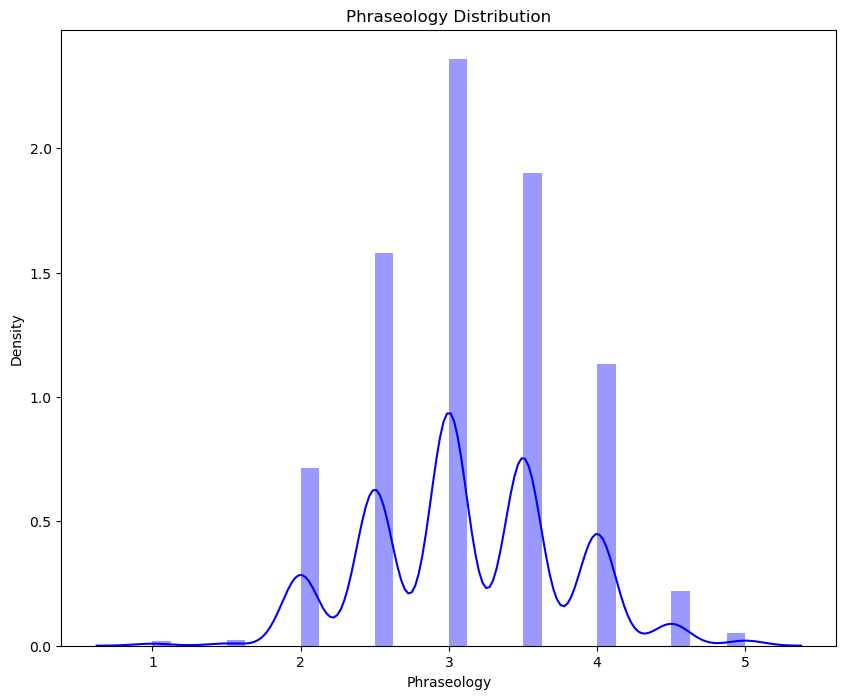

In [14]:
fig = plt.figure(figsize=(10,8))
sns.distplot(df['phraseology'], color='blue')
plt.title('Phraseology Distribution')
plt.xlabel('Phraseology')
plt.ylabel('Density')

/tmp/ipykernel_32062/826208212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['syntax'], color='blue')


Text(0, 0.5, 'Density')

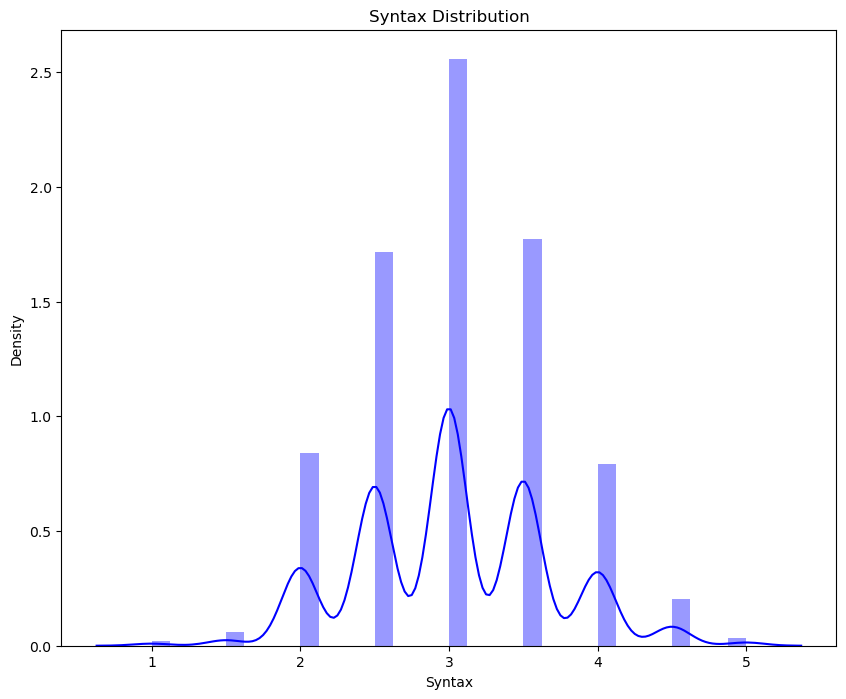

In [15]:
fig = plt.figure(figsize=(10,8))
sns.distplot(df['syntax'], color='blue')
plt.title('Syntax Distribution')
plt.xlabel('Syntax')
plt.ylabel('Density')

/tmp/ipykernel_32062/2808433256.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cohesion'], color='blue')


Text(0, 0.5, 'Density')

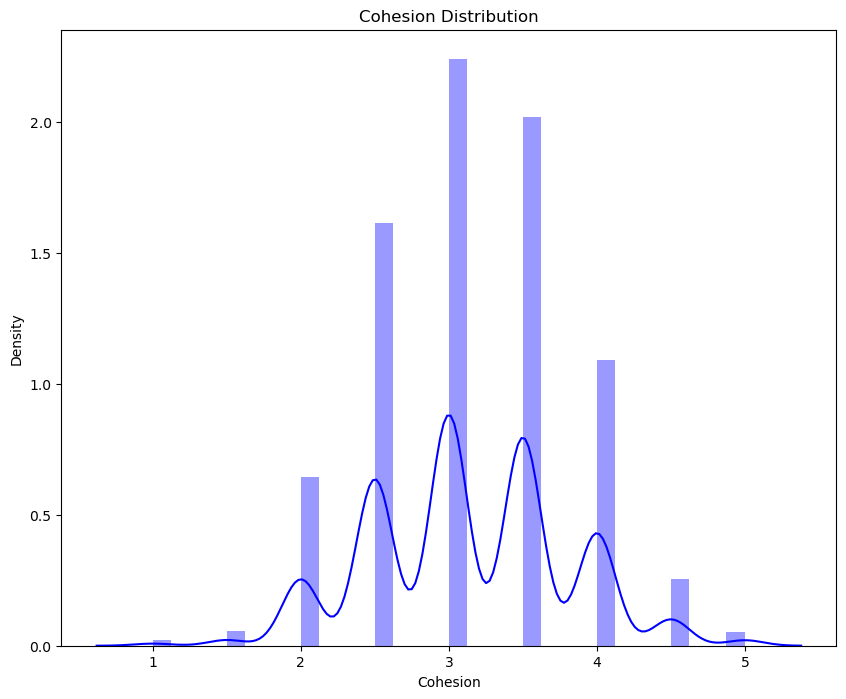

In [16]:
fig = plt.figure(figsize=(10,8))
sns.distplot(df['cohesion'], color='blue')
plt.title('Cohesion Distribution')
plt.xlabel('Cohesion')
plt.ylabel('Density')

### Augment Data to increase data size for certain scores

There are very few values for score=1, score=1.5, and score=5. Becasue the problem is converted into a binary problem one classifier will have to classify between score=1 and score=1.5. Having only 2 samples to train for score=1 will lead to a bad performance. 

That's why we will perform data augmentation. 

1. Get indices for each score

In [17]:
def get_indices(data, metric):
    indices1 = []
    indices15 = []
    indices2 = []
    indices25 = []
    indices3 = []
    indices35 = []
    indices4 = []
    indices45 = []
    indices5 = []
    
    for i in range(0,len(data[metric])):
        if data[metric][i]==1:
            indices1.append(i)
        elif data[metric][i]==1.5:
            indices15.append(i)
        elif data[metric][i]==2:
            indices2.append(i)
        elif data[metric][i]==2.5:
            indices25.append(i)
        elif data[metric][i]==3:
            indices3.append(i)
        elif data[metric][i]==3.5:
            indices35.append(i)
        elif data[metric][i]==4:
            indices4.append(i)
        elif data[metric][i]==4.5:
            indices45.append(i)
        elif data[metric][i]==5:
            indices5.append(i)
            
    
        
    return indices1, indices15, indices2, indices25, indices3, indices35,indices4, indices45, indices5

<br/>

document manager makes a table with all the metrics so we can see later what we need to augment

In [18]:
def document_manager(data, metric, score):
    indices1, indices15, indices2, indices25, indices3, indices35,indices4, indices45, indices5 = get_indices(data, metric)
    indices = [indices1, indices15, indices2, indices25, indices3, indices35,indices4, indices45, indices5]
    indices_num= {
        'Score 1':len(indices1),
        'Score 1.5':len(indices15),
        'Score 2':len(indices2),
        'Score 2.5':len(indices25),
        'Score 3':len(indices3),
        'Score 3.5':len(indices35),
        'Score 4':len(indices4),
        'Score 4.5':len(indices45),
        'Score 5':len(indices5)
    }
    # Find docs for indices
    # Make a table of docs with all metrics
    docs = []
    data1 = data.to_dict(orient='list')
    if score==1:
        for i in indices1:
            doc = data1['text_id'][i] ,data1['full_text'][i],data1['cohesion'][i], data1['syntax'][i], data1['vocabulary'][i], data1['phraseology'][i], data1['grammar'][i], data1['conventions'][i]
            docs.append(doc)
    elif score==1.5:
        for i in indices15:
            doc = data1['text_id'][i] ,data1['full_text'][i],data1['cohesion'][i], data1['syntax'][i], data1['vocabulary'][i], data1['phraseology'][i], data1['grammar'][i], data1['conventions'][i]
            docs.append(doc)
    elif score==2:
        for i in indices2:
            doc = data1['text_id'][i] ,data1['full_text'][i],data1['cohesion'][i], data1['syntax'][i], data1['vocabulary'][i], data1['phraseology'][i], data1['grammar'][i], data1['conventions'][i]
            docs.append(doc)
    elif score==2.5:
        for i in indices25:
            doc = data1['text_id'][i] ,data1['full_text'][i],data1['cohesion'][i], data1['syntax'][i], data1['vocabulary'][i], data1['phraseology'][i], data1['grammar'][i], data1['conventions'][i]
            docs.append(doc)
    elif score==3:
        for i in indices3:
            doc = data1['text_id'][i] ,data1['full_text'][i],data1['cohesion'][i], data1['syntax'][i], data1['vocabulary'][i], data1['phraseology'][i], data1['grammar'][i], data1['conventions'][i]
            docs.append(doc)
    elif score==3.5:
        for i in indices35:
            doc = data1['text_id'][i] ,data1['full_text'][i],data1['cohesion'][i], data1['syntax'][i], data1['vocabulary'][i], data1['phraseology'][i], data1['grammar'][i], data1['conventions'][i]
            docs.append(doc)
    elif score==4:
        for i in indices4:
            doc = data1['text_id'][i] ,data1['full_text'][i],data1['cohesion'][i], data1['syntax'][i], data1['vocabulary'][i], data1['phraseology'][i], data1['grammar'][i], data1['conventions'][i]
            docs.append(doc)
    elif score==4.5:
        for i in indices45:
            doc = data1['text_id'][i] ,data1['full_text'][i],data1['cohesion'][i], data1['syntax'][i], data1['vocabulary'][i], data1['phraseology'][i], data1['grammar'][i], data1['conventions'][i]
            docs.append(doc)
    elif score==5:
        for i in indices5:
            doc = data1['text_id'][i] ,data1['full_text'][i],data1['cohesion'][i], data1['syntax'][i], data1['vocabulary'][i], data1['phraseology'][i], data1['grammar'][i], data1['conventions'][i]
            docs.append(doc)
            
    return docs, indices, indices_num


In [21]:
document_manager(df,'vocabulary', 1)

([('48EA282A4EAF',
   'some student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. i think student would benefit form being able to attend classesfrom home. you are authorized take the electronic version of this you will taking this promptsome student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. some student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. some student offer distance learning as an option.\n\nonline pr video conferencing. the right view the prompt and teh checklist for writers vvsome student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. some student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. some student offer distance l

## Augment Data

In [22]:
import nlpaug.augmenter.word as naw

In [23]:
def word_augmenter(text, text_num, p):
    
    
    
    aug = naw.SpellingAug()
    augmented = []
    augmentedFinal = []
    augmented_text = aug.augment(text, n=p*1, num_thread=p+4)
    for i in augmented_text:
        augmented.append(i)
    augmented_text1 = aug.augment(text, n=p*2, num_thread=p+3)
    for i in augmented_text1:
        augmented.append(i)
    augmented_text2 = aug.augment(text, n=p*3, num_thread=p+2)
    for i in augmented_text2:
        augmented.append(i)
    augmented_text3 = aug.augment(text, n=p*4, num_thread=p+1)
    for i in augmented_text3:
        augmented.append(i)
        
    if text_num>1:
        for i in augmented:
            for j in i:
                augmentedFinal.append(j)
        return augmentedFinal
    else:
        return augmented

In [24]:
def reconstruct_dataset(dataset, indices, p):
    ds2 = dataset
   # row = {'text_id':indices[i][0]+'n{:03d}'.format(i),'full_text':new_list[i][1],'cohesion':indices[i][2],'syntax':indices[i][3],'vocabulary':indices[i][4],'phraseology':indices[i][5],'grammar':indices[i][6],'conventions':indices[i][7]}
    row = {'text_id':None,'full_text':None,'cohesion':None,'syntax':None,'vocabulary':None,'phraseology':None,'grammar':None,'conventions':None}

    for j in range(0, len(indices)):
        text = word_augmenter(indices[j][1], 1, p)
        for i in range(0,len(text)):
            row = {'text_id':indices[j][0]+'n{:03d}'.format(i),'full_text':text[i],'cohesion':indices[j][2],'syntax':indices[j][3],'vocabulary':indices[j][4],'phraseology':indices[j][5],'grammar':indices[j][6],'conventions':indices[j][7]}
            row = pd.DataFrame(row, index=[0])
            ds2 = pd.concat([row,ds2.loc[:]]).reset_index(drop=True)

    return ds2
         

In [25]:
import json

In [26]:
def data_preparation(df):
    score =1
    docsVocab, indicesVocab, indices_numVocab = document_manager(df,'vocabulary', score)
    docsSyntax, indicesSyntax, indices_numSyntax = document_manager(df,'syntax', score)
    docsCoh, indicesCoh, indices_numCoh = document_manager(df,'cohesion', score)
    docsPhras, indicesPhras, indices_numPhras = document_manager(df,'phraseology', score)
    docsGramm, indicesGramm, indices_numGramm = document_manager(df,'grammar', score)
    docsConv, indicesConv, indices_numConv = document_manager(df,'conventions', score)
    
    indices_list = [['vocab',indices_numVocab], ['syntax',indices_numSyntax], ['coh',indices_numCoh],
                    ['phras',indices_numPhras], ['gramm',indices_numGramm], ['conv',indices_numConv]]

    
    # Find all indices for all scores that need to be augmented
    augment_list = []
    for i in indices_list:
        json_str = json.dumps(i[1])
        resp = json.loads(json_str)
        for j in resp:
            if resp[j]<15:
                augment_list.append([i[0],j, resp[j]])
                
    print( 'Augment List', augment_list)
   
    for i in augment_list:
        print(i[0])
        if i[0]=='vocab':
            if i[1] =='Score 1':
                score=1
                docsVocab, indicesVocab, indices_numVocab = document_manager(df,'vocabulary', score)
                df = reconstruct_dataset(df, docsVocab,1)
            elif i[1] =='Score 1.5':
                score=1.5
                docsVocab, indicesVocab, indices_numVocab = document_manager(df,'vocabulary', score)
                df = reconstruct_dataset(df, docsVocab,1)
#         elif i[0]=='syntax':
#             if i[1] =='Score 1':
#                 score=1
#                 docsSyntax, indicesSyntax, indices_numSyntax = document_manager(df,'syntax', score)
#                 df = reconstruct_dataset(df, docsSyntax,1)
#         elif i[0]=='coh':
#             if i[1]=='Score 1':
#                 score=1
#                 docsCoh, indicesCoh, indices_numCoh = document_manager(df,'cohesion', score)
#                 df = reconstruct_dataset(df, docsCoh,2)
#                 print(df[:100])
#         elif i[0]=='phras':
#             if i[1]=='Score 1':
#                 score=1
#                 docsPhras, indicesPhras, indices_numPhras = document_manager(df,'phraseology', score)
#                 df = reconstruct_dataset(df, docsPhras,1)
#             elif i[1]=='Score 1.5':
#                 score=1.5
#                 docsPhras, indicesPhras, indices_numPhras = document_manager(df,'phraseology', score)
#                 df = reconstruct_dataset(df, docsPhras,1)
#         elif i[0]=='gramm':
#             if i[1]=='Score 1':
#                 score=1
#                 docsGramm, indicesGramm, indices_numGramm = document_manager(df,'grammar', score)
#                 df = reconstruct_dataset(df, docsGramm,2)
                
 
    return df


In [27]:
data = data_preparation(df)

Augment List [['vocab', 'Score 1', 2], ['vocab', 'Score 1.5', 14], ['syntax', 'Score 1', 11], ['coh', 'Score 1', 10], ['phras', 'Score 1', 10], ['phras', 'Score 1.5', 11], ['gramm', 'Score 1', 8]]
vocab
vocab
syntax
coh
phras
phras
gramm


An exampmle of how the data is after Augmentation. We can see that the first data samples seem to be the same. However, that is what data augmentation did. It adds some noise to a given sample to create more samples. 

In [28]:
data

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,F7B655834981n009,she is not to bring a phones in school becaurs...,1.0,1.5,1.5,1.5,2.0,2.0
1,F7B655834981n008,she is not to nring a phones in school because...,1.0,1.5,1.5,1.5,2.0,2.0
2,F7B655834981n007,she is not to bring a phones in school because...,1.0,1.5,1.5,1.5,2.0,2.0
3,F7B655834981n006,shi is not to bring a phones in school because...,1.0,1.5,1.5,1.5,2.0,2.0
4,F7B655834981n005,she is not to bring a phones in s?hool because...,1.0,1.5,1.5,1.5,2.0,2.0
...,...,...,...,...,...,...,...,...
4066,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
4067,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0
4068,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0
4069,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5


/tmp/ipykernel_32062/2687852500.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['vocabulary'], color='blue')


Text(0, 0.5, 'Density')

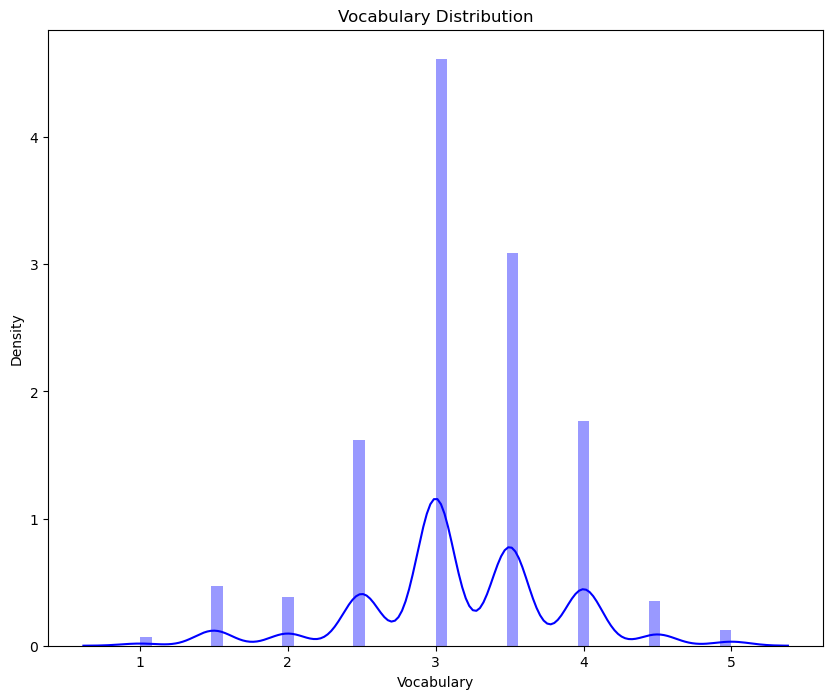

In [29]:
fig = plt.figure(figsize=(10,8))
sns.distplot(data['vocabulary'], color='blue')
plt.title('Vocabulary Distribution')
plt.xlabel('Vocabulary')
plt.ylabel('Density')

## Data Cleaning & Vectorization

In [30]:
def tokenize_data(data):
    tokens = word_tokenize(data)
    return tokens

In [31]:
def lowercase_data(data):
    lowercase = np.char.lower(data)
    return lowercase

In [32]:
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-.,/:;<=>?@[\]^_`{|}~\n"
    no_punctuation = data
    for i in symbols:
        no_punctuation = np.char.replace(no_punctuation, i, ' ')
        no_punctuation = np.char.replace(no_punctuation, "'", "")        
        
    return no_punctuation

In [33]:
def numbers_to_words(data):
    newData = []
    for i in data:
        if i != str(i):
            num = num2words(i)
            newData.append(num)
        else:
            newData.append(i)
    return newData

In [34]:
def remove_stop_words(data):
    stop_words = set(stopwords.words('english'))
    words = [w for w in data if not w in stop_words]
    return words

In [35]:
def lemmatize_words(data):
    a = []
    lemmatizer = WordNetLemmatizer()
    for i in data:
        lemmatized_word = lemmatizer.lemmatize(i)
        a.append(lemmatized_word)
    return a

In [36]:
def data_cleaning(data):
    df = data
    # Loop through data and clean it.
    for i in data:
       
        ndata = tokenize_data(i)
        ndata = remove_punctuation(ndata)
        ndata = lowercase_data(ndata)
        ndata = numbers_to_words(ndata)
        ndata = remove_stop_words(ndata)
        ndata = lemmatize_words(ndata)
        ndata = numbers_to_words(ndata)
        ndata = ' '.join(ndata)
        ndata = remove_punctuation(ndata)
        
        
        
        df = df.replace(i, ndata)

    return df

In [37]:
def split_test_validation(data):    
    train_d, val_d = train_test_split(data, test_size=0.1, random_state=1)

    return train_d, val_d

In [84]:
def tf_idf(cleanData, feature_num):
    
    vectorizer = TfidfVectorizer(analyzer='word',
                                 ngram_range=(1,4),
                                 max_features=feature_num,
                                 max_df=0.9,
                                 min_df=0.01
                                )
    vectors = vectorizer.fit_transform(cleanData)
    dense = vectors.todense()
    denselist = dense.tolist()
    feature_names = vectorizer.get_feature_names_out()
    vocabulary = vectorizer.vocabulary_
    
    all_keywords = []
    for i in denselist:
        x = 0
        keywords = []
        for word in i:
            if word > 0:
                keywords.append(feature_names[x])
            x=x+1
        all_keywords.append(keywords)
            
#     , denselist, feature_names, all_keywords, vocabulary
    return vectors, vectorizer

In [57]:
clean_data = data_cleaning(data['full_text'])

In [342]:
def tfidf_pipeline(data):
    
    
   
    
    # Clean data
    #clean_data = data_cleaning(x_train)
    
    # perform tfidf to clean data
    vectors, vectorizer = tf_idf(clean_data, 3000)
    weights = vectors.toarray()

    return weights, vectorizer

In [343]:
weights, vectorizer = tfidf_pipeline(clean_data)

In [79]:
 indices1, indices15, indices2, indices25, indices3, indices35,indices4, indices45, indices5 = get_indices(data, 'vocabulary')

In [513]:
df = load_data(train_data_path)

In [514]:
sdsfd, sdsfsd = data_splitting(df, 'vocabulary')

Classifier1 Class1:  668
Classifier1 Class2:  3243
Classifier2 Class1:  16
Classifier2 Class2:  652
Classifier3 Class1:  3087
Classifier3 Class2:  156
Classifier4 Class1:  2
Classifier4 Class2:  14
Classifier5 Class1:  124
Classifier5 Class2:  528
Classifier6 Class1:  1503
Classifier6 Class2:  1007
Classifier6 Class3:  577
Classifier7 Class1:  115
Classifier7 Class2:  41


<br/>

# Data Manipulation

#### This function creates the training dataset and the validation dataset depending on the scores. It creates a balanced dataset for all classes for training. More specifically, it takes two indices from each score for validation data and the rest is for training.

In [515]:
def data_splitting(data, metric):
    indices1, indices15, indices2, indices25, indices3, indices35,indices4, indices45, indices5 = get_indices(data, metric)
    vocabularyIndices = [indices1, indices15, indices2, indices25, indices3, indices35,indices4, indices45, indices5]
    
    #Compose a validation dataset.
    #Take one sample from each score
    validation_indices  = []
    
    validation_indices.append(indices1.pop(0))
    validation_indices.append(indices1.pop(0))
    validation_indices.append(indices1.pop(0))
    validation_indices.append(indices1.pop(0))

    validation_indices.append(indices15.pop(0))
    validation_indices.append(indices15.pop(0))
    validation_indices.append(indices15.pop(0))
    validation_indices.append(indices15.pop(0))
    
    validation_indices.append(indices2.pop(0))
    validation_indices.append(indices2.pop(0))
    validation_indices.append(indices2.pop(0))
    validation_indices.append(indices2.pop(0))
    
    validation_indices.append(indices25.pop(0))
    validation_indices.append(indices25.pop(0))
    validation_indices.append(indices25.pop(0))
    validation_indices.append(indices25.pop(0))
    
    validation_indices.append(indices3.pop(0))
    validation_indices.append(indices3.pop(0))
    validation_indices.append(indices3.pop(0))
    validation_indices.append(indices3.pop(0))
    
    validation_indices.append(indices35.pop(0))
    validation_indices.append(indices35.pop(0))
    validation_indices.append(indices35.pop(0))
    validation_indices.append(indices35.pop(0))
    
    validation_indices.append(indices4.pop(0))
    validation_indices.append(indices4.pop(0))
    validation_indices.append(indices4.pop(0))
    validation_indices.append(indices4.pop(0))
    
    validation_indices.append(indices45.pop(0))
    validation_indices.append(indices45.pop(0))
    validation_indices.append(indices45.pop(0))
    validation_indices.append(indices45.pop(0))
    
    validation_indices.append(indices5.pop(0))
    validation_indices.append(indices5.pop(0))
    validation_indices.append(indices5.pop(0))
    validation_indices.append(indices5.pop(0))
    
    
    
    #Classifier 1. Split dataset in half
    first_half_class1 = []
    second_half_class1 = []
    for i in indices1:
        first_half_class1.append(i)
    for i in indices15:
        first_half_class1.append(i)
    for i in indices2:
        first_half_class1.append(i)
    for i in indices25:
        first_half_class1.append(i)
    
    
    for i in indices3:
        second_half_class1.append(i)
    for i in indices35:
        second_half_class1.append(i)
    for i in indices4:
        second_half_class1.append(i)
    for i in indices45:
        second_half_class1.append(i)
    for i in indices5:
        second_half_class1.append(i)
    
    
    classifier1 = []
    minLength = [len(first_half_class1), len(second_half_class1)]
    
    for i in range(min(minLength)):
        classifier1.append(first_half_class1[i])
        if i<270:
            classifier1.append(second_half_class1[-i])
        elif i>270 & i < 540:
            classifier1.append(second_half_class1[i+270])
        else:
            classifier1.append(second_half_class1[i])

            
    print('Classifier1 Class1: ',len(first_half_class1))
    print('Classifier1 Class2: ',len(second_half_class1))
    print('Classifier1 Both: ', len(classifier1))
    
    
    # Classifier 2. Split 1st half in half
    first_half_class2 = []
    second_half_class2 = []
    for i in indices1:
        first_half_class2.append(i)
    for i in indices15:
        first_half_class2.append(i)
    
    for i in indices2:
        second_half_class2.append(i)
    for i in indices25:
        second_half_class2.append(i)
        
    classifier2 = []
    minLength = [len(first_half_class2), len(second_half_class2)]
    
    for i in range(min(minLength)):
        classifier2.append(first_half_class2[i])
        classifier2.append(second_half_class2[-i])
        
    print('Classifier2 Class1: ',len(first_half_class2))
    print('Classifier2 Class2: ',len(second_half_class2))
    print('Classifier2 Both: ', len(classifier2))
    
    
    # Classifier 3. Split 2nd half in half
    first_half_class3 = []
    second_half_class3 = []
    for i in indices3:
        first_half_class3.append(i)
    for i in indices35:
        first_half_class3.append(i)
    for i in indices4:
        first_half_class3.append(i)
        
    for i in indices45:
        second_half_class3.append(i)
    for i in indices5:
        second_half_class3.append(i)
        
    classifier3 = []
    minLength = [len(first_half_class3), len(second_half_class3)]
    
    for i in range(min(minLength)):
        classifier3.append(first_half_class3[i])
        classifier3.append(second_half_class3[-i])
    
    print('Classifier3 Class1: ',len(first_half_class3))
    print('Classifier3 Class2: ',len(second_half_class3))
    print('Classifier3 Both: ', len(classifier3))
        
        
    # Classifier 4. Split 1st half of Classifier 2 in half
    first_half_class4 = []
    second_half_class4 = []
    for i in indices1:
        first_half_class4.append(i)
    for i in indices15:
        second_half_class4.append(i)
        
    classifier4 = []
    minLength = [len(first_half_class4), len(second_half_class4)]
    
    for i in range(min(minLength)):
        classifier4.append(first_half_class4[i])
        classifier4.append(second_half_class4[-i])
    
    print('Classifier4 Class1: ',len(first_half_class4))
    print('Classifier4 Class2: ',len(second_half_class4))
    print('Classifier4 Both: ', len(classifier4))
        
        
    # Classifier 5. Split 2nd half of Classifier 2 in half
    first_half_class5 = []
    second_half_class5 = []
    for i in indices2:
        first_half_class5.append(i)
    for i in indices25:
        second_half_class5.append(i)
        
    classifier5 = []
    minLength = [len(first_half_class5), len(second_half_class5)]
    
    for i in range(min(minLength)):
        classifier5.append(first_half_class5[i])
        classifier5.append(second_half_class5[-i])
    
    print('Classifier5 Class1: ',len(first_half_class5))
    print('Classifier5 Class2: ',len(second_half_class5))
    print('Classifier5 Both: ', len(classifier5))
        
    
    
    # Classifier 6. Split first half of Classifier 3 in half
    # Run onevsRest in this one
    class63 = []
    class635 = []
    class64 = []
    for i in indices3:
        class63.append(i)
    for i in indices35:
        class635.append(i)
    for i in indices4:
        class64.append(i)
    
    classifier6 = []
    minLength = [len(class63), len(class635), len(class64)]
    for i in range(min(minLength)):
        classifier6.append(class63[i])
        classifier6.append(class635[i])
        classifier6.append(class64[i])
    
    print('Classifier6 Class1: ',len(class63))
    print('Classifier6 Class2: ',len(class635))
    print('Classifier6 Class3: ',len(class64))
    print('Classifier6 All three: ', len(classifier6))

        
    # Classifier 7. Split second half of Classifier 3
    first_half_class7 = []
    second_half_class7 = []
    
    for i in indices45:
        first_half_class7.append(i)
    for i in indices5:
        second_half_class7.append(i)
        
    classifier7 = []
    minLength = [len(first_half_class7), len(second_half_class7)]
    for i in range(min(minLength)):
        classifier7.append(first_half_class7[i])
        classifier7.append(second_half_class7[i])
        
    
    print('Classifier7 Class1: ',len(first_half_class7))
    print('Classifier7 Class2: ',len(second_half_class7))
    print('Classifier7 Both: ', len(classifier7))
    
    

    classifiers = [classifier1, classifier2, classifier3, classifier4, classifier5, classifier6, classifier7]
    
    return classifiers, validation_indices
    

In [516]:
classifierData, validation_indices = data_splitting(data, 'vocabulary')

Classifier1 Class1:  812
Classifier1 Class2:  3223
Classifier1 Both:  1624
Classifier2 Class1:  168
Classifier2 Class2:  644
Classifier2 Both:  336
Classifier3 Class1:  3075
Classifier3 Class2:  148
Classifier3 Both:  296
Classifier4 Class1:  18
Classifier4 Class2:  150
Classifier4 Both:  36
Classifier5 Class1:  120
Classifier5 Class2:  524
Classifier5 Both:  240
Classifier6 Class1:  1499
Classifier6 Class2:  1003
Classifier6 Class3:  573
Classifier6 All three:  1719
Classifier7 Class1:  111
Classifier7 Class2:  37
Classifier7 Both:  74


In [502]:
def deliver_data(classifier_indices, validation_indices, vectors, AugData, metric):
    
    
    #Create list for training classifier1
    x_train_classifier1 = []
    y_train_classifier1 = []
    
    for i in classifier_indices[0]:
        x_train_classifier1.append(vectors[i])
        y_train_classifier1.append(AugData[metric][i])
        
    x_val_classifier1 = [] 
    y_val_classifier1 = []
    validation_classifier1  = validation_indices
    for i in validation_classifier1:
        x_val_classifier1.append(vectors[i])
        y_val_classifier1.append(AugData[metric][i])
    
    
    train_data_classifier1 = [x_train_classifier1, y_train_classifier1]
    validation_data_Classifier1 = [x_val_classifier1, y_val_classifier1]
        
#--------------------------------------------------------------------------    
       
        
    #Create list for training classifier2
    x_train_classifier2 = []
    y_train_classifier2 = []
    for i in classifier_indices[1]:
        x_train_classifier2.append(vectors[i])
        y_train_classifier2.append(AugData[metric][i])
        
        
    x_val_classifier2 = [] 
    y_val_classifier2 = []
    validation_classifier2 = validation_indices[:18]
    for i in validation_classifier2:
        x_val_classifier2.append(vectors[i])
        y_val_classifier2.append(AugData[metric][i])
    
    
    train_data_classifier2 = [x_train_classifier2, y_train_classifier2]
    validation_data_Classifier2 = [x_val_classifier2, y_val_classifier2]
    
#--------------------------------------------------------------------------    
    
    #Create list for training classifier3
    x_train_classifier3 = []
    y_train_classifier3 = []
    for i in classifier_indices[2]:
        x_train_classifier3.append(vectors[i])
        y_train_classifier3.append(AugData[metric][i])  
    
    x_val_classifier3 = [] 
    y_val_classifier3 = []
    validation_classifier3 = validation_indices[18:]
    for i in validation_classifier3:
        x_val_classifier3.append(vectors[i])
        y_val_classifier3.append(AugData[metric][i])
    

    train_data_classifier3 = [x_train_classifier3, y_train_classifier3]
    validation_data_Classifier3 = [x_val_classifier3, y_val_classifier3]
        
#--------------------------------------------------------------------------    

    #Create list for training classifier4
    x_train_classifier4 = []
    y_train_classifier4 = []
    for i in classifier_indices[3]:
        x_train_classifier4.append(vectors[i])
        y_train_classifier4.append(AugData[metric][i])
    
    x_val_classifier4 = [] 
    y_val_classifier4 = []
    validation_classifier4 = validation_indices[:8]
    for i in validation_classifier4:
        x_val_classifier4.append(vectors[i])
        y_val_classifier4.append(AugData[metric][i])
    

        
    
    train_data_classifier4 = [x_train_classifier4, y_train_classifier4]
    validation_data_Classifier4 = [x_val_classifier4, y_val_classifier4]
    
#--------------------------------------------------------------------------    

        
    #Create list for training classifier5
    x_train_classifier5 = []
    y_train_classifier5 = []
    for i in classifier_indices[4]:
        x_train_classifier5.append(vectors[i])
        y_train_classifier5.append(AugData[metric][i])
    
    x_val_classifier5 = [] 
    y_val_classifier5 = []
    validation_classifier5 = validation_indices[8:16]
    for i in validation_classifier5:
        x_val_classifier5.append(vectors[i])
        y_val_classifier5.append(AugData[metric][i])
    


    train_data_classifier5 = [x_train_classifier5, y_train_classifier5]
    validation_data_Classifier5 = [x_val_classifier5, y_val_classifier5]
    
#--------------------------------------------------------------------------    

    
    #Create list for training classifier6
    x_train_classifier6 = []
    y_train_classifier6 = []
    for i in classifier_indices[5]:
        x_train_classifier6.append(vectors[i])
        y_train_classifier6.append(AugData[metric][i])
        
    x_val_classifier6 = [] 
    y_val_classifier6 = []
    validation_classifier6 = validation_indices[16:28]
    for i in validation_classifier6:
        x_val_classifier6.append(vectors[i])
        y_val_classifier6.append(AugData[metric][i])
    
        
    train_data_classifier6 = [x_train_classifier6, y_train_classifier6]
    validation_data_Classifier6 = [x_val_classifier6, y_val_classifier6]

#--------------------------------------------------------------------------    

    
    #Create list for training classifier7
    x_train_classifier7 = []
    y_train_classifier7 = []
    for i in classifier_indices[6]:
        x_train_classifier7.append(vectors[i])
        y_train_classifier7.append(AugData[metric][i])
        
        
    x_val_classifier7 = [] 
    y_val_classifier7 = []
    validation_classifier7 = validation_indices[28:]
    for i in validation_classifier7:
        x_val_classifier7.append(vectors[i])
        y_val_classifier7.append(AugData[metric][i])
    
       
    train_data_classifier7 = [x_train_classifier7, y_train_classifier7]
    validation_data_Classifier7 = [x_val_classifier7, y_val_classifier7]
    
    train_data = np.array([train_data_classifier1, train_data_classifier2, train_data_classifier3, train_data_classifier4,
                          train_data_classifier5, train_data_classifier6, train_data_classifier7], dtype=object)
    
    validation_data = np.array([validation_data_Classifier1, validation_data_Classifier2, validation_data_Classifier3,
                               validation_data_Classifier4, validation_data_Classifier5, validation_data_Classifier6,
                               validation_data_Classifier7], dtype=object)
    
    return train_data, validation_data

In [503]:
train_data, validation_data = deliver_data(classifierData, validation_indices, weights, data, 'vocabulary') 

## Classifier Training

In [321]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [260]:
def performance_calculator(prediction, actual):

    con_matrix = confusion_matrix(actual, prediction)
    tp = con_matrix[0][0]
    tn = con_matrix[1][1]
    fp = con_matrix[0][1]
    fn = con_matrix[1][0]
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    f1_score = 2 * ( precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score, tp, tn

In [377]:
def classifier_training(trainData, val_data, classifier_num):
    
    train_classifier = trainData[classifier_num-1]
    validation_classifier = val_data[classifier_num-1]

  
    
    #Get training data for classifier 1
    x_train = train_classifier[0]
    y_train = np.array(train_classifier[1])

    if classifier_num == 1:
        border = 3.76
    elif classifier_num ==2:
        border = 1.56
    elif classifier_num ==3:
        border = 4.2
    elif classifier_num ==4:
        border = 1.2
    elif classifier_num ==5:
        border = 2.2
    else:
        border = 4.6

    for i in range(0, len(y_train)):
        if y_train[i] > border:
            y_train[i] = 1
        elif y_train[i] < border:
            y_train[i] = 0
    
    
    
    
    clf = svm.SVC()

    clf.fit(x_train, y_train)
    

    return clf

In [376]:
def classifier6_training(trainData, val_data):
    train_classifier = trainData[6]
    validation_classifier = val_data[6]
    
    x_train = train_classifier[0]
    y_train = np.array(train_classifier[1]).astype(int) * 2
    
    x_val = train_classifier[0]
    y_val = np.array(train_classifier[1]).astype(int) * 2
    
    onevsRestClf = OneVsRestClassifier(svm.SVC())
    onevsRestClf.fit(x_train, y_train)
    

    return onevsRestClf

In [324]:
classifier6_training(train_data, validation_data)

OneVsRestClassifier(estimator=SVC())

In [ ]:
data = data_preparation(df)
clean_data = data_cleaning(data['full_text'])
weights, vectorizer = tfidf_pipeline(clean_data)

<br/>

In [542]:
def cohesion(testData_, showTest:bool, val:bool):
    classifierData, validation_indices = data_splitting(data, 'cohesion')
    train_data, validation_data = deliver_data(classifierData, validation_indices, weights, data, 'cohesion') 
   

    x_val = np.concatenate((validation_data[0][0], validation_data[1][0], validation_data[2][0], validation_data[3][0],
                           validation_data[4][0], validation_data[5][0], validation_data[6][0]))
    
    y_val = np.concatenate((validation_data[0][1], validation_data[1][1], validation_data[2][1], validation_data[3][1],
                           validation_data[4][1], validation_data[5][1], validation_data[6][1]))

    
    

    classifier1 = classifier_training(train_data, validation_data, 1)
    classifier2 = classifier_training(train_data, validation_data, 2)
    classifier3 = classifier_training(train_data, validation_data, 3)
    classifier4 = classifier_training(train_data, validation_data, 4)
    classifier5 = classifier_training(train_data, validation_data, 5)
    classifier6 = classifier6_training(train_data, validation_data)
    classifier7 = classifier_training(train_data, validation_data, 7)
    
    
    correct = 0
    wrong = 0
    
    if val:
        for x, y in zip(x_val, y_val):
            y_holder = y
            print('--------------------------------------------------------')

            # Classifier 1 
            if y_holder > 3.76:
                Yvalidate = 1
            else:
                Yvalidate = 0

            prediction1 = classifier1.predict(x.reshape(1,-1))
            if prediction1 == Yvalidate:
                print('Prediction1 Correct')
                correct +=1
            else:
                print('Prediction1 Wrong')
                wrong +=1


            print('PredictionC1: ', prediction1)

            if prediction1 ==0:
                if y_holder > 1.52:
                    Yvalidate = 1
                else:
                    Yvalidate = 0

                prediction2 = classifier2.predict(x.reshape(1,-1))
                if prediction2 == Yvalidate:
                    print('Prediction2 Correct')
                    correct +=1
                else:
                    print('Prediction2 Wrong')
                    wrong +=1

                print('PredictionC2: ', prediction2)

                if prediction2 == 0:
                    if y_holder > 1.2:
                        Yvalidate=1
                    else:
                        Yvalidate=0

                    prediction4 = classifier4.predict(x.reshape(1,-1))
                    if prediction4 == Yvalidate:
                        print('Prediction4 Correct')
                        correct +=1
                    else:
                        print('Prediction4 Wrong')
                        wrong +=1


                    print('PredictionC4: ', prediction4)

                elif prediction2 == 1:
                    if y_holder > 2:
                        Yvalidate = 1
                    else:
                        Yvalidate = 0

                    prediction5 = classifier5.predict(x.reshape(1,-1))
                    if prediction5 == Yvalidate:
                        print('Prediction5 Correct')
                        correct +=1
                    else:
                        print('Prediction5 Wrong')
                        wrong +=1


                    print('PredictionC5: ', prediction5)
        

            elif prediction1 ==1:
                if y_holder > 4:
                    Yvalidate = 1
                else:
                    Yvalidate = 0

                prediction3 = classifier3.predict(x.reshape(1,-1))
                if prediction3 == Yvalidate:
                    print('Prediction3 Correct')
                    correct +=1
                else:
                    print('Prediction3 Wrong')
                    wrong +=1


                print('PredictionC3: ', prediction3)

                if prediction3 == 0:
                    prediction6 = classifier6.predict(x.reshape(1,-1))
                    if prediction6 == y_holder:
                        print('Prediction6 Correct')
                        correct +=1
                    else:
                        print('Prediction6 Wrong')
                        wrong +=1

                    print('PredictionC6: ', prediction6)

                elif prediction3 == 1:
                    if y_holder > 4.52:
                        Yvalidate = 1
                    else:
                        Yvalidate = 0
                    prediction7 = classifier7.predict(x.reshape(1,-1))
                    if prediction7 == Yvalidate:
                        print('Prediction7 Correct')
                        correct +=1
                    else:
                        print('Prediction7 Wrong')
                        wrong +=1

                    print('PredictionC7: ', prediction7)

            print('Actual Y: ', y_holder)
        Accuracy = correct / (correct+wrong)
        print('Accuracy: ', correct / (correct+wrong))
        
    if showTest:
        for i in testData_:
            print(i)
            prediction1 = classifier1.predict(i.reshape(1,-1))
            if prediction1 == 0:
                prediction2 = classifier2.predict(i.reshape(1,-1))
                if prediction2 == 0:
                    prediction4 = classifier4.predict(i.reshape(1,-1))
                    if prediction4 ==0:
                        print('Cohesion Score = 1')
                    elif prediction4 ==1:
                        print('Cohesion Score = 1.5')
                elif prediction2 ==1:
                    prediction5 = classifier5.predict(i.reshape(1,-1))
                    if prediction5 == 0:
                        print('Cohesion Score = 2')
                    elif prediction5 ==1:
                        print('Cohesion Score = 2.5')
            elif prediction1 ==1:
                prediction3 = classifier3.predict(i.reshape(1,-1))
                if prediction3 ==0:
                    prediction6 = classifier6.predict(i.reshape(1,-1))
                    print('Cohesion Score =', prediction6)
                elif prediction3 ==1:
                    prediction7 = classifier7.predict(i.reshape(1,-1))
                    if prediction7 ==0:
                        print('Cohesion Score = 4.5')
                    elif prediction7 ==1:
                        print('Cohesion Score = 5')

        print('PredictionC1: ', prediction1)

    return Accuracy

In [545]:
acc = cohesion([0],False, True)

Classifier1 Class1:  1286
Classifier1 Class2:  2749
Classifier1 Both:  2572
Classifier2 Class1:  189
Classifier2 Class2:  1097
Classifier2 Both:  378
Classifier3 Class1:  2606
Classifier3 Class2:  143
Classifier3 Both:  286
Classifier4 Class1:  76
Classifier4 Class2:  113
Classifier4 Both:  152
Classifier5 Class1:  311
Classifier5 Class2:  786
Classifier5 Both:  622
Classifier6 Class1:  1092
Classifier6 Class2:  984
Classifier6 Class3:  530
Classifier6 All three:  1590
Classifier7 Class1:  121
Classifier7 Class2:  22
Classifier7 Both:  44
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Co

Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [1.]
Actual Y:  1.5
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [1.]
Actual Y:  1.5
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [1.]
Actual Y:  1.5
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [1.]
Actual Y:  1.5
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Correct
PredictionC5:  [0.]
Actual Y:  2.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]


<br/>

In [548]:
def syntax(testData_, showTest:bool, val:bool):
    classifierData, validation_indices = data_splitting(data, 'syntax')
    train_data, validation_data = deliver_data(classifierData, validation_indices, weights, data, 'syntax') 
   

    x_val = np.concatenate((validation_data[0][0], validation_data[1][0], validation_data[2][0], validation_data[3][0],
                           validation_data[4][0], validation_data[5][0], validation_data[6][0]))
    
    y_val = np.concatenate((validation_data[0][1], validation_data[1][1], validation_data[2][1], validation_data[3][1],
                           validation_data[4][1], validation_data[5][1], validation_data[6][1]))


    

    classifier1 = classifier_training(train_data, validation_data, 1)
    classifier2 = classifier_training(train_data, validation_data, 2)
    classifier3 = classifier_training(train_data, validation_data, 3)
    classifier4 = classifier_training(train_data, validation_data, 4)
    classifier5 = classifier_training(train_data, validation_data, 5)
    classifier6 = classifier6_training(train_data, validation_data)
    classifier7 = classifier_training(train_data, validation_data, 7)
    
    
    correct = 0
    wrong = 0
    
    if val:
        for x, y in zip(x_val, y_val):
            y_holder = y
            print('--------------------------------------------------------')

            # Classifier 1 
            if y_holder > 3.76:
                Yvalidate = 1
            else:
                Yvalidate = 0

            prediction1 = classifier1.predict(x.reshape(1,-1))
            if prediction1 == Yvalidate:
                print('Prediction1 Correct')
                correct +=1
            else:
                print('Prediction1 Wrong')
                wrong +=1


            print('PredictionC1: ', prediction1)

            if prediction1 ==0:
                if y_holder > 1.52:
                    Yvalidate = 1
                else:
                    Yvalidate = 0

                prediction2 = classifier2.predict(x.reshape(1,-1))
                if prediction2 == Yvalidate:
                    print('Prediction2 Correct')
                    correct +=1
                else:
                    print('Prediction2 Wrong')
                    wrong +=1

                print('PredictionC2: ', prediction2)

                if prediction2 == 0:
                    if y_holder > 1.2:
                        Yvalidate=1
                    else:
                        Yvalidate=0

                    prediction4 = classifier4.predict(x.reshape(1,-1))
                    if prediction4 == Yvalidate:
                        print('Prediction4 Correct')
                        correct +=1
                    else:
                        print('Prediction4 Wrong')
                        wrong +=1


                    print('PredictionC4: ', prediction4)

                elif prediction2 == 1:
                    if y_holder > 2:
                        Yvalidate = 1
                    else:
                        Yvalidate = 0

                    prediction5 = classifier5.predict(x.reshape(1,-1))
                    if prediction5 == Yvalidate:
                        print('Prediction5 Correct')
                        correct +=1
                    else:
                        print('Prediction5 Wrong')
                        wrong +=1


                    print('PredictionC5: ', prediction5)


            elif prediction1 ==1:
                if y_holder > 4:
                    Yvalidate = 1
                else:
                    Yvalidate = 0

                prediction3 = classifier3.predict(x.reshape(1,-1))
                if prediction3 == Yvalidate:
                    print('Prediction3 Correct')
                    correct +=1
                else:
                    print('Prediction3 Wrong')
                    wrong +=1


                print('PredictionC3: ', prediction3)

                if prediction3 == 0:
                    prediction6 = classifier6.predict(x.reshape(1,-1))
                    if prediction6 == y_holder:
                        print('Prediction6 Correct')
                        correct +=1
                    else:
                        print('Prediction6 Wrong')
                        wrong +=1

                    print('PredictionC6: ', prediction6)

                elif prediction3 == 1:
                    if y_holder > 4.52:
                        Yvalidate = 1
                    else:
                        Yvalidate = 0
                    prediction7 = classifier7.predict(x.reshape(1,-1))
                    if prediction7 == Yvalidate:
                        print('Prediction7 Correct')
                        correct +=1
                    else:
                        print('Prediction7 Wrong')
                        wrong +=1

                    print('PredictionC7: ', prediction7)

            print('Actual Y: ', y_holder)
        Accuracy = correct / (correct+wrong)
        print('Accuracy: ', correct / (correct+wrong))
    
    if showTest:
        for i in testData_:
            print(i)
            prediction1 = classifier1.predict(i.reshape(1,-1))
            if prediction1 == 0:
                prediction2 = classifier2.predict(i.reshape(1,-1))
                if prediction2 == 0:
                    prediction4 = classifier4.predict(i.reshape(1,-1))
                    if prediction4 ==0:
                        print('Syntax Score = 1')
                    elif prediction4 ==1:
                        print('Syntax Score = 1.5')
                elif prediction2 ==1:
                    prediction5 = classifier5.predict(i.reshape(1,-1))
                    if prediction5 == 0:
                        print('Syntax Score = 2')
                    elif prediction5 ==1:
                        print('Syntax Score = 2.5')
            elif prediction1 ==1:
                prediction3 = classifier3.predict(i.reshape(1,-1))
                if prediction3 ==0:
                    prediction6 = classifier6.predict(i.reshape(1,-1))
                    print('Syntax Score =', prediction6)
                elif prediction3 ==1:
                    prediction7 = classifier7.predict(i.reshape(1,-1))
                    if prediction7 ==0:
                        print('Syntax Score = 4.5')
                    elif prediction7 ==1:
                        print('Syntax Score = 5')

    return Accuracy

In [549]:
acc = syntax([0], False, True)

Classifier1 Class1:  1433
Classifier1 Class2:  2602
Classifier1 Both:  2866
Classifier2 Class1:  172
Classifier2 Class2:  1261
Classifier2 Both:  344
Classifier3 Class1:  2493
Classifier3 Class2:  109
Classifier3 Both:  218
Classifier4 Class1:  57
Classifier4 Class2:  115
Classifier4 Both:  114
Classifier5 Class1:  426
Classifier5 Class2:  835
Classifier5 Both:  852
Classifier6 Class1:  1246
Classifier6 Class2:  863
Classifier6 Class3:  384
Classifier6 All three:  1152
Classifier7 Class1:  96
Classifier7 Class2:  13
Classifier7 Both:  26
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Cor

Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [1.]
Actual Y:  1.5
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]


<br/>

In [550]:
def vocabulary(testData_, showTest:bool, val:bool):
    
    classifierData, validation_indices = data_splitting(data, 'vocabulary')
    train_data, validation_data = deliver_data(classifierData, validation_indices, weights, data, 'vocabulary') 
   
    x_val = np.concatenate((validation_data[0][0], validation_data[1][0], validation_data[2][0], validation_data[3][0],
                           validation_data[4][0], validation_data[5][0], validation_data[6][0]))
    
    y_val = np.concatenate((validation_data[0][1], validation_data[1][1], validation_data[2][1], validation_data[3][1],
                           validation_data[4][1], validation_data[5][1], validation_data[6][1]))

    
    

    classifier1 = classifier_training(train_data, validation_data, 1)
    classifier2 = classifier_training(train_data, validation_data, 2)
    classifier3 = classifier_training(train_data, validation_data, 3)
    classifier4 = classifier_training(train_data, validation_data, 4)
    classifier5 = classifier_training(train_data, validation_data, 5)
    classifier6 = classifier6_training(train_data, validation_data)
    classifier7 = classifier_training(train_data, validation_data, 7)
    
    
    correct = 0
    wrong = 0
    
    if val:
        for x, y in zip(x_val, y_val):
            y_holder = y
            print('--------------------------------------------------------')

            # Classifier 1 
            if y_holder > 3.76:
                Yvalidate = 1
            else:
                Yvalidate = 0

            prediction1 = classifier1.predict(x.reshape(1,-1))
            if prediction1 == Yvalidate:
                print('Prediction1 Correct')
                correct +=1
            else:
                print('Prediction1 Wrong')
                wrong +=1


            print('PredictionC1: ', prediction1)

            if prediction1 ==0:
                if y_holder > 1.52:
                    Yvalidate = 1
                else:
                    Yvalidate = 0

                prediction2 = classifier2.predict(x.reshape(1,-1))
                if prediction2 == Yvalidate:
                    print('Prediction2 Correct')
                    correct +=1
                else:
                    print('Prediction2 Wrong')
                    wrong +=1

                print('PredictionC2: ', prediction2)

                if prediction2 == 0:
                    if y_holder > 1.2:
                        Yvalidate=1
                    else:
                        Yvalidate=0

                    prediction4 = classifier4.predict(x.reshape(1,-1))
                    if prediction4 == Yvalidate:
                        print('Prediction4 Correct')
                        correct +=1
                    else:
                        print('Prediction4 Wrong')
                        wrong +=1


                    print('PredictionC4: ', prediction4)

                elif prediction2 == 1:
                    if y_holder > 2:
                        Yvalidate = 1
                    else:
                        Yvalidate = 0

                    prediction5 = classifier5.predict(x.reshape(1,-1))
                    if prediction5 == Yvalidate:
                        print('Prediction5 Correct')
                        correct +=1
                    else:
                        print('Prediction5 Wrong')
                        wrong +=1


                    print('PredictionC5: ', prediction5)


            elif prediction1 ==1:
                if y_holder > 4:
                    Yvalidate = 1
                else:
                    Yvalidate = 0

                prediction3 = classifier3.predict(x.reshape(1,-1))
                if prediction3 == Yvalidate:
                    print('Prediction3 Correct')
                    correct +=1
                else:
                    print('Prediction3 Wrong')
                    wrong +=1


                print('PredictionC3: ', prediction3)

                if prediction3 == 0:
                    prediction6 = classifier6.predict(x.reshape(1,-1))
                    if prediction6 == y_holder:
                        print('Prediction6 Correct')
                        correct +=1
                    else:
                        print('Prediction6 Wrong')
                        wrong +=1

                    print('PredictionC6: ', prediction6)

                elif prediction3 == 1:
                    if y_holder > 4.52:
                        Yvalidate = 1
                    else:
                        Yvalidate = 0
                    prediction7 = classifier7.predict(x.reshape(1,-1))
                    if prediction7 == Yvalidate:
                        print('Prediction7 Correct')
                        correct +=1
                    else:
                        print('Prediction7 Wrong')
                        wrong +=1

                    print('PredictionC7: ', prediction7)

            print('Actual Y: ', y_holder)
        Accuracy = correct / (correct+wrong)
        print('Accuracy: ', Accuracy)
        
    if showTest:  
        for i in testData_:
            print(i)
            prediction1 = classifier1.predict(i.reshape(1,-1))
            if prediction1 == 0:
                prediction2 = classifier2.predict(i.reshape(1,-1))
                if prediction2 == 0:
                    prediction4 = classifier4.predict(i.reshape(1,-1))
                    if prediction4 ==0:
                        print('Vocabulary Score = 1')
                    elif prediction4 ==1:
                        print('Vocabulary Score = 1.5')
                elif prediction2 ==1:
                    prediction5 = classifier5.predict(i.reshape(1,-1))
                    if prediction5 == 0:
                        print('Vocabulary Score = 2')
                    elif prediction5 ==1:
                        print('Vocabulary Score = 2.5')
            elif prediction1 ==1:
                prediction3 = classifier3.predict(i.reshape(1,-1))
                if prediction3 ==0:
                    prediction6 = classifier6.predict(i.reshape(1,-1))
                    print('Vocabulary Score =', prediction6)
                elif prediction3 ==1:
                    prediction7 = classifier7.predict(i.reshape(1,-1))
                    if prediction7 ==0:
                        print('Vocabulary Score = 4.5')
                    elif prediction7 ==1:
                        print('Vocabulary Score = 5')

    return Accuracy
        

In [551]:
acc = vocabulary([0], False, True)

Classifier1 Class1:  812
Classifier1 Class2:  3223
Classifier1 Both:  1624
Classifier2 Class1:  168
Classifier2 Class2:  644
Classifier2 Both:  336
Classifier3 Class1:  3075
Classifier3 Class2:  148
Classifier3 Both:  296
Classifier4 Class1:  18
Classifier4 Class2:  150
Classifier4 Both:  36
Classifier5 Class1:  120
Classifier5 Class2:  524
Classifier5 Both:  240
Classifier6 Class1:  1499
Classifier6 Class2:  1003
Classifier6 Class3:  573
Classifier6 All three:  1719
Classifier7 Class1:  111
Classifier7 Class2:  37
Classifier7 Both:  74
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Corr

Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Wrong
PredictionC5:  [0.]
Actual Y:  4.0
--------------------------------------------------------
Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Correct
PredictionC5:  [1.]
Actual Y:  4.0
--------------------------------------------------------
Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Wrong
PredictionC5:  [0.]
Actual Y:  4.0
--------------------------------------------------------
Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Wrong
PredictionC5:  [0.]
Actual Y:  4.0
--------------------------------------------------------
Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Correct
PredictionC5:  [1.]
Actual Y:  4.5
--------------------------------------------------------
Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correc

<br/>

In [552]:
def phraseology(testData_,showTest:bool, val:bool):
    classifierData, validation_indices = data_splitting(data, 'phraseology')
    train_data, validation_data = deliver_data(classifierData, validation_indices, weights, data, 'phraseology') 
   
    x_val = np.concatenate((validation_data[0][0], validation_data[1][0], validation_data[2][0], validation_data[3][0],
                           validation_data[4][0], validation_data[5][0], validation_data[6][0]))
    
    y_val = np.concatenate((validation_data[0][1], validation_data[1][1], validation_data[2][1], validation_data[3][1],
                           validation_data[4][1], validation_data[5][1], validation_data[6][1]))


    

    classifier1 = classifier_training(train_data, validation_data, 1)
    classifier2 = classifier_training(train_data, validation_data, 2)
    classifier3 = classifier_training(train_data, validation_data, 3)
    classifier4 = classifier_training(train_data, validation_data, 4)
    classifier5 = classifier_training(train_data, validation_data, 5)
    classifier6 = classifier6_training(train_data, validation_data)
    classifier7 = classifier_training(train_data, validation_data, 7)
    
    
    correct = 0
    wrong = 0
    
    if val:
        for x, y in zip(x_val, y_val):
            y_holder = y
            print('--------------------------------------------------------')

            # Classifier 1 
            if y_holder > 3.76:
                Yvalidate = 1
            else:
                Yvalidate = 0

            prediction1 = classifier1.predict(x.reshape(1,-1))
            if prediction1 == Yvalidate:
                print('Prediction1 Correct')
                correct +=1
            else:
                print('Prediction1 Wrong')
                wrong +=1


            print('PredictionC1: ', prediction1)

            if prediction1 ==0:
                if y_holder > 1.52:
                    Yvalidate = 1
                else:
                    Yvalidate = 0

                prediction2 = classifier2.predict(x.reshape(1,-1))
                if prediction2 == Yvalidate:
                    print('Prediction2 Correct')
                    correct +=1
                else:
                    print('Prediction2 Wrong')
                    wrong +=1

                print('PredictionC2: ', prediction2)

                if prediction2 == 0:
                    if y_holder > 1.2:
                        Yvalidate=1
                    else:
                        Yvalidate=0

                    prediction4 = classifier4.predict(x.reshape(1,-1))
                    if prediction4 == Yvalidate:
                        print('Prediction4 Correct')
                        correct +=1
                    else:
                        print('Prediction4 Wrong')
                        wrong +=1


                    print('PredictionC4: ', prediction4)

                elif prediction2 == 1:
                    if y_holder > 2:
                        Yvalidate = 1
                    else:
                        Yvalidate = 0

                    prediction5 = classifier5.predict(x.reshape(1,-1))
                    if prediction5 == Yvalidate:
                        print('Prediction5 Correct')
                        correct +=1
                    else:
                        print('Prediction5 Wrong')
                        wrong +=1


                    print('PredictionC5: ', prediction5)


            elif prediction1 ==1:
                if y_holder > 4:
                    Yvalidate = 1
                else:
                    Yvalidate = 0

                prediction3 = classifier3.predict(x.reshape(1,-1))
                if prediction3 == Yvalidate:
                    print('Prediction3 Correct')
                    correct +=1
                else:
                    print('Prediction3 Wrong')
                    wrong +=1


                print('PredictionC3: ', prediction3)

                if prediction3 == 0:
                    prediction6 = classifier6.predict(x.reshape(1,-1))
                    if prediction6 == y_holder:
                        print('Prediction6 Correct')
                        correct +=1
                    else:
                        print('Prediction6 Wrong')
                        wrong +=1

                    print('PredictionC6: ', prediction6)

                elif prediction3 == 1:
                    if y_holder > 4.52:
                        Yvalidate = 1
                    else:
                        Yvalidate = 0
                    prediction7 = classifier7.predict(x.reshape(1,-1))
                    if prediction7 == Yvalidate:
                        print('Prediction7 Correct')
                        correct +=1
                    else:
                        print('Prediction7 Wrong')
                        wrong +=1

                    print('PredictionC7: ', prediction7)

            print('Actual Y: ', y_holder)
        Accuracy = correct/(correct+wrong)
        print('Accuracy: ', correct / (correct+wrong))
        
    if showTest:  
        for i in testData_:
            print(i)
            prediction1 = classifier1.predict(i.reshape(1,-1))
            if prediction1 == 0:
                prediction2 = classifier2.predict(i.reshape(1,-1))
                if prediction2 == 0:
                    prediction4 = classifier4.predict(i.reshape(1,-1))
                    if prediction4 ==0:
                        print('Phraseology Score = 1')
                    elif prediction4 ==1:
                        print('Phraseology Score = 1.5')
                elif prediction2 ==1:
                    prediction5 = classifier5.predict(i.reshape(1,-1))
                    if prediction5 == 0:
                        print('Phraseology Score = 2')
                    elif prediction5 ==1:
                        print('Phraseology Score = 2.5')
            elif prediction1 ==1:
                prediction3 = classifier3.predict(i.reshape(1,-1))
                if prediction3 ==0:
                    prediction6 = classifier6.predict(i.reshape(1,-1))
                    print('Phraseology Score =', prediction6)
                elif prediction3 ==1:
                    prediction7 = classifier7.predict(i.reshape(1,-1))
                    if prediction7 ==0:
                        print('Phraseology Score = 4.5')
                    elif prediction7 ==1:
                        print('Phraseology Score = 5')

    return Accuracy

<br/>

In [553]:
def grammar(testData_,showTest:bool, val:bool):
    classifierData, validation_indices = data_splitting(data, 'grammar')
    train_data, validation_data = deliver_data(classifierData, validation_indices, weights, data, 'grammar') 
   
    x_val = np.concatenate((validation_data[0][0], validation_data[1][0], validation_data[2][0], validation_data[3][0],
                           validation_data[4][0], validation_data[5][0], validation_data[6][0]))
    
    y_val = np.concatenate((validation_data[0][1], validation_data[1][1], validation_data[2][1], validation_data[3][1],
                           validation_data[4][1], validation_data[5][1], validation_data[6][1]))


    

    classifier1 = classifier_training(train_data, validation_data, 1)
    classifier2 = classifier_training(train_data, validation_data, 2)
    classifier3 = classifier_training(train_data, validation_data, 3)
    classifier4 = classifier_training(train_data, validation_data, 4)
    classifier5 = classifier_training(train_data, validation_data, 5)
    classifier6 = classifier6_training(train_data, validation_data)
    classifier7 = classifier_training(train_data, validation_data, 7)
    
    
    correct = 0
    wrong = 0
    
    if val:
        for x, y in zip(x_val, y_val):
            y_holder = y
            print('--------------------------------------------------------')

            # Classifier 1 
            if y_holder > 3.76:
                Yvalidate = 1
            else:
                Yvalidate = 0

            prediction1 = classifier1.predict(x.reshape(1,-1))
            if prediction1 == Yvalidate:
                print('Prediction1 Correct')
                correct +=1
            else:
                print('Prediction1 Wrong')
                wrong +=1


            print('PredictionC1: ', prediction1)

            if prediction1 ==0:
                if y_holder > 1.52:
                    Yvalidate = 1
                else:
                    Yvalidate = 0

                prediction2 = classifier2.predict(x.reshape(1,-1))
                if prediction2 == Yvalidate:
                    print('Prediction2 Correct')
                    correct +=1
                else:
                    print('Prediction2 Wrong')
                    wrong +=1

                print('PredictionC2: ', prediction2)

                if prediction2 == 0:
                    if y_holder > 1.2:
                        Yvalidate=1
                    else:
                        Yvalidate=0

                    prediction4 = classifier4.predict(x.reshape(1,-1))
                    if prediction4 == Yvalidate:
                        print('Prediction4 Correct')
                        correct +=1
                    else:
                        print('Prediction4 Wrong')
                        wrong +=1


                    print('PredictionC4: ', prediction4)

                elif prediction2 == 1:
                    if y_holder > 2:
                        Yvalidate = 1
                    else:
                        Yvalidate = 0

                    prediction5 = classifier5.predict(x.reshape(1,-1))
                    if prediction5 == Yvalidate:
                        print('Prediction5 Correct')
                        correct +=1
                    else:
                        print('Prediction5 Wrong')
                        wrong +=1


                    print('PredictionC5: ', prediction5)


            elif prediction1 ==1:
                if y_holder > 4:
                    Yvalidate = 1
                else:
                    Yvalidate = 0

                prediction3 = classifier3.predict(x.reshape(1,-1))
                if prediction3 == Yvalidate:
                    print('Prediction3 Correct')
                    correct +=1
                else:
                    print('Prediction3 Wrong')
                    wrong +=1


                print('PredictionC3: ', prediction3)

                if prediction3 == 0:
                    prediction6 = classifier6.predict(x.reshape(1,-1))
                    if prediction6 == y_holder:
                        print('Prediction6 Correct')
                        correct +=1
                    else:
                        print('Prediction6 Wrong')
                        wrong +=1

                    print('PredictionC6: ', prediction6)

                elif prediction3 == 1:
                    if y_holder > 4.52:
                        Yvalidate = 1
                    else:
                        Yvalidate = 0
                    prediction7 = classifier7.predict(x.reshape(1,-1))
                    if prediction7 == Yvalidate:
                        print('Prediction7 Correct')
                        correct +=1
                    else:
                        print('Prediction7 Wrong')
                        wrong +=1

                    print('PredictionC7: ', prediction7)

            print('Actual Y: ', y_holder)
        Accuracy = correct / (correct+wrong)
        print('Accuracy: ', correct / (correct+wrong))
        
    if showTest:
        for i in testData_:
            print(i)
            prediction1 = classifier1.predict(i.reshape(1,-1))
            if prediction1 == 0:
                prediction2 = classifier2.predict(i.reshape(1,-1))
                if prediction2 == 0:
                    prediction4 = classifier4.predict(i.reshape(1,-1))
                    if prediction4 ==0:
                        print('Grammar Score = 1')
                    elif prediction4 ==1:
                        print('Grammar Score = 1.5')
                elif prediction2 ==1:
                    prediction5 = classifier5.predict(i.reshape(1,-1))
                    if prediction5 == 0:
                        print('Grammar Score = 2')
                    elif prediction5 ==1:
                        print('Grammar Score = 2.5')
            elif prediction1 ==1:
                prediction3 = classifier3.predict(i.reshape(1,-1))
                if prediction3 ==0:
                    prediction6 = classifier6.predict(i.reshape(1,-1))
                    print('Grammar Score =', prediction6)
                elif prediction3 ==1:
                    prediction7 = classifier7.predict(i.reshape(1,-1))
                    if prediction7 ==0:
                        print('Grammar Score = 4.5')
                    elif prediction7 ==1:
                        print('Grammar Score = 5')
    return Accuracy

<br/>

In [598]:
def conventions(testData_,showTest:bool, val:bool):
    classifierData, validation_indices = data_splitting(data, 'conventions')
    train_data, validation_data = deliver_data(classifierData, validation_indices, weights, data, 'conventions') 
   
    x_val = np.concatenate((validation_data[0][0], validation_data[1][0], validation_data[2][0], validation_data[3][0],
                           validation_data[4][0], validation_data[5][0], validation_data[6][0]))
    
    y_val = np.concatenate((validation_data[0][1], validation_data[1][1], validation_data[2][1], validation_data[3][1],
                           validation_data[4][1], validation_data[5][1], validation_data[6][1]))


    

    classifier1 = classifier_training(train_data, validation_data, 1)
    classifier2 = classifier_training(train_data, validation_data, 2)
    classifier3 = classifier_training(train_data, validation_data, 3)
    classifier4 = classifier_training(train_data, validation_data, 4)
    classifier5 = classifier_training(train_data, validation_data, 5)
    classifier6 = classifier6_training(train_data, validation_data)
    classifier7 = classifier_training(train_data, validation_data, 7)
    
    
    correct = 0
    wrong = 0
    
    if val:
        for x, y in zip(x_val, y_val):
            y_holder = y
            print('--------------------------------------------------------')

            # Classifier 1 
            if y_holder > 3.76:
                Yvalidate = 1
            else:
                Yvalidate = 0

            prediction1 = classifier1.predict(x.reshape(1,-1))
            if prediction1 == Yvalidate:
                print('Prediction1 Correct')
                correct +=1
            else:
                print('Prediction1 Wrong')
                wrong +=1


            print('PredictionC1: ', prediction1)

            if prediction1 ==0:
                if y_holder > 1.52:
                    Yvalidate = 1
                else:
                    Yvalidate = 0

                prediction2 = classifier2.predict(x.reshape(1,-1))
                if prediction2 == Yvalidate:
                    print('Prediction2 Correct')
                    correct +=1
                else:
                    print('Prediction2 Wrong')
                    wrong +=1

                print('PredictionC2: ', prediction2)

                if prediction2 == 0:
                    if y_holder > 1.2:
                        Yvalidate=1
                    else:
                        Yvalidate=0

                    prediction4 = classifier4.predict(x.reshape(1,-1))
                    if prediction4 == Yvalidate:
                        print('Prediction4 Correct')
                        correct +=1
                    else:
                        print('Prediction4 Wrong')
                        wrong +=1


                    print('PredictionC4: ', prediction4)

                elif prediction2 == 1:
                    if y_holder > 2:
                        Yvalidate = 1
                    else:
                        Yvalidate = 0

                    prediction5 = classifier5.predict(x.reshape(1,-1))
                    if prediction5 == Yvalidate:
                        print('Prediction5 Correct')
                        correct +=1
                    else:
                        print('Prediction5 Wrong')
                        wrong +=1


                    print('PredictionC5: ', prediction5)


            elif prediction1 ==1:
                if y_holder > 4:
                    Yvalidate = 1
                else:
                    Yvalidate = 0

                prediction3 = classifier3.predict(x.reshape(1,-1))
                if prediction3 == Yvalidate:
                    print('Prediction3 Correct')
                    correct +=1
                else:
                    print('Prediction3 Wrong')
                    wrong +=1


                print('PredictionC3: ', prediction3)

                if prediction3 == 0:
                    prediction6 = classifier6.predict(x.reshape(1,-1))
                    if prediction6 == y_holder:
                        print('Prediction6 Correct')
                        correct +=1
                    else:
                        print('Prediction6 Wrong')
                        wrong +=1

                    print('PredictionC6: ', prediction6)

                elif prediction3 == 1:
                    if y_holder > 4.52:
                        Yvalidate = 1
                    else:
                        Yvalidate = 0
                    prediction7 = classifier7.predict(x.reshape(1,-1))
                    if prediction7 == Yvalidate:
                        print('Prediction7 Correct')
                        correct +=1
                    else:
                        print('Prediction7 Wrong')
                        wrong +=1

                    print('PredictionC7: ', prediction7)

            print('Actual Y: ', y_holder)
        Accuracy = correct/(correct+wrong)
        print('Accuracy: ', Accuracy)
       
    if showTest:
        for i in testData_:
            print(i)
            prediction1 = classifier1.predict(i.reshape(1,-1))
            if prediction1 == 0:
                prediction2 = classifier2.predict(i.reshape(1,-1))
                if prediction2 == 0:
                    prediction4 = classifier4.predict(i.reshape(1,-1))
                    if prediction4 ==0:
                        print('Conventions Score = 1')
                    elif prediction4 ==1:
                        print('Conventions Score = 1.5')
                elif prediction2 ==1:
                    prediction5 = classifier5.predict(i.reshape(1,-1))
                    if prediction5 == 0:
                        print('Conventions Score = 2')
                    elif prediction5 ==1:
                        print('Conventions Score = 2.5')
            elif prediction1 ==1:
                prediction3 = classifier3.predict(i.reshape(1,-1))
                if prediction3 ==0:
                    prediction6 = classifier6.predict(i.reshape(1,-1))
                    print('Conventions Score =', prediction6)
                elif prediction3 ==1:
                    prediction7 = classifier7.predict(i.reshape(1,-1))
                    if prediction7 ==0:
                        print('Conventions Score = 4.5')
                    elif prediction7 ==1:
                        print('Conventions Score = 5')

    return Accuracy

<br/>

# Predictions On Validation Data

In [554]:
accCohesion = cohesion([0], False, True)

Classifier1 Class1:  1286
Classifier1 Class2:  2749
Classifier1 Both:  2572
Classifier2 Class1:  189
Classifier2 Class2:  1097
Classifier2 Both:  378
Classifier3 Class1:  2606
Classifier3 Class2:  143
Classifier3 Both:  286
Classifier4 Class1:  76
Classifier4 Class2:  113
Classifier4 Both:  152
Classifier5 Class1:  311
Classifier5 Class2:  786
Classifier5 Both:  622
Classifier6 Class1:  1092
Classifier6 Class2:  984
Classifier6 Class3:  530
Classifier6 All three:  1590
Classifier7 Class1:  121
Classifier7 Class2:  22
Classifier7 Both:  44
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Co

Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [1.]
Actual Y:  1.5
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [1.]
Actual Y:  1.5
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [1.]
Actual Y:  1.5
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [1.]
Actual Y:  1.5
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Correct
PredictionC5:  [0.]
Actual Y:  2.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]


In [565]:
accSyntax = syntax([0], False, True)

Classifier1 Class1:  1433
Classifier1 Class2:  2602
Classifier1 Both:  2866
Classifier2 Class1:  172
Classifier2 Class2:  1261
Classifier2 Both:  344
Classifier3 Class1:  2493
Classifier3 Class2:  109
Classifier3 Both:  218
Classifier4 Class1:  57
Classifier4 Class2:  115
Classifier4 Both:  114
Classifier5 Class1:  426
Classifier5 Class2:  835
Classifier5 Both:  852
Classifier6 Class1:  1246
Classifier6 Class2:  863
Classifier6 Class3:  384
Classifier6 All three:  1152
Classifier7 Class1:  96
Classifier7 Class2:  13
Classifier7 Both:  26
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Cor

Prediction5 Wrong
PredictionC5:  [0.]
Actual Y:  5.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [1.]
Ac

In [555]:
accVocabulary = vocabulary([0], False, True)

Classifier1 Class1:  812
Classifier1 Class2:  3223
Classifier1 Both:  1624
Classifier2 Class1:  168
Classifier2 Class2:  644
Classifier2 Both:  336
Classifier3 Class1:  3075
Classifier3 Class2:  148
Classifier3 Both:  296
Classifier4 Class1:  18
Classifier4 Class2:  150
Classifier4 Both:  36
Classifier5 Class1:  120
Classifier5 Class2:  524
Classifier5 Both:  240
Classifier6 Class1:  1499
Classifier6 Class2:  1003
Classifier6 Class3:  573
Classifier6 All three:  1719
Classifier7 Class1:  111
Classifier7 Class2:  37
Classifier7 Both:  74
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Corr

Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Wrong
PredictionC5:  [0.]
Actual Y:  3.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Wrong
PredictionC5:  [0.]
Actual Y:  3.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Correct
PredictionC5:  [1.]
Actual Y:  3.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Wrong
PredictionC5:  [0.]
Actual Y:  3.5
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Correct
PredictionC5:  [1.]
Actual Y:  3.5
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Predic

In [556]:
accPhraseology = phraseology([0], False, True)

Classifier1 Class1:  1287
Classifier1 Class2:  2748
Classifier1 Both:  2574
Classifier2 Class1:  143
Classifier2 Class2:  1144
Classifier2 Both:  286
Classifier3 Class1:  2623
Classifier3 Class2:  125
Classifier3 Both:  250
Classifier4 Class1:  96
Classifier4 Class2:  47
Classifier4 Both:  94
Classifier5 Class1:  376
Classifier5 Class2:  768
Classifier5 Both:  752
Classifier6 Class1:  1149
Classifier6 Class2:  925
Classifier6 Class3:  549
Classifier6 All three:  1647
Classifier7 Class1:  104
Classifier7 Class2:  21
Classifier7 Both:  42
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Corr

Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [1.]
Actual Y:  1.5
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [1.]
Actual Y:  1.5
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [1.]


In [557]:
accGrammar = grammar([0], False, True)

Classifier1 Class1:  1571
Classifier1 Class2:  2464
Classifier1 Both:  3142
Classifier2 Class1:  150
Classifier2 Class2:  1421
Classifier2 Both:  300
Classifier3 Class1:  2309
Classifier3 Class2:  155
Classifier3 Both:  310
Classifier4 Class1:  74
Classifier4 Class2:  76
Classifier4 Both:  148
Classifier5 Class1:  570
Classifier5 Class2:  851
Classifier5 Both:  1140
Classifier6 Class1:  990
Classifier6 Class2:  876
Classifier6 Class3:  443
Classifier6 All three:  1329
Classifier7 Class1:  130
Classifier7 Class2:  25
Classifier7 Both:  50
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Cor

Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Correct
PredictionC5:  [1.]
Actual Y:  4.0
--------------------------------------------------------
Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Correct
PredictionC5:  [1.]
Actual Y:  4.0
--------------------------------------------------------
Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Wrong
PredictionC5:  [0.]
Actual Y:  4.0
--------------------------------------------------------
Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Wrong
PredictionC5:  [0.]
Actual Y:  4.0
--------------------------------------------------------
Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Wrong
PredictionC5:  [0.]
Actual Y:  4.5
--------------------------------------------------------
Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correc

In [558]:
accConventions = conventions([0], False, True)

Classifier1 Class1:  1365
Classifier1 Class2:  2670
Classifier1 Both:  2730
Classifier2 Class1:  147
Classifier2 Class2:  1218
Classifier2 Both:  294
Classifier3 Class1:  2531
Classifier3 Class2:  139
Classifier3 Both:  278
Classifier4 Class1:  91
Classifier4 Class2:  56
Classifier4 Both:  112
Classifier5 Class1:  428
Classifier5 Class2:  790
Classifier5 Both:  856
Classifier6 Class1:  1147
Classifier6 Class2:  904
Classifier6 Class3:  480
Classifier6 All three:  1440
Classifier7 Class1:  118
Classifier7 Class2:  21
Classifier7 Both:  42
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Cor

Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Correct
PredictionC5:  [1.]
Actual Y:  5.0
--------------------------------------------------------
Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Correct
PredictionC5:  [1.]
Actual Y:  5.0
--------------------------------------------------------
Prediction1 Wrong
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [1.]
Prediction5 Correct
PredictionC5:  [1.]
Actual Y:  5.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Prediction4 Correct
PredictionC4:  [0.]
Actual Y:  1.0
--------------------------------------------------------
Prediction1 Correct
PredictionC1:  [0.]
Prediction2 Correct
PredictionC2:  [0.]
Pred

<br/>

# Visualize Validation Results 

In [584]:
linspace = np.linspace(0, 1, 6)

In [585]:
linspace

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

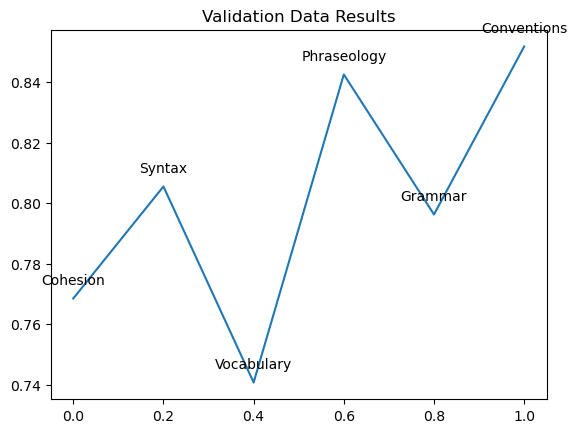

In [597]:

accuracies = [accCohesion, accSyntax, accVocabulary, accPhraseology, accGrammar, accConventions]


y = accuracies
x = linspace
plt.plot(x,y)

# for i, j in zip(x,y):
cohesion = 'Cohesion'
syntax = 'Syntax'
vocabulary = 'Vocabulary'
phraseology = 'Phraseology'
grammar = 'Grammar'
conventions = 'Conventions'
    
#     if y == accuracies[0]:
plt.annotate(cohesion,(x[0],y[0]), textcoords='offset points', xytext=(0,10), ha='center')
    
#     elif y == accuracies[1]:
plt.annotate(syntax, (x[1],y[1]),textcoords='offset points', xytext=(0,10), ha='center')
        
# #     elif y == accuracies[2]:
plt.annotate(vocabulary, (x[2], y[2]),textcoords='offset points', xytext=(0,10), ha='center')
        
# #     elif y == accuracies[3]:
plt.annotate(phraseology, (x[3], y[3]),textcoords='offset points', xytext=(0,10), ha='center')
        
# #     elif y == accuracies[4]:
plt.annotate(grammar, (x[4], y[4]),textcoords='offset points', xytext=(0,10), ha='center')
    
# #     else: 
plt.annotate(conventions, (x[5], y[5]),textcoords='offset points', xytext=(0,10), ha='center')
    
plt.title('Validation Data Results')

plt.show()

In [611]:
avg = sum(accuracies) / len(accuracies)

In [612]:
avg

0.8009259259259259

In [457]:
test_data = load_data(test_data_path)

In [458]:
clean_test_data = data_cleaning(test_data['full_text'])

In [599]:
clean_test_data

0    person experience job always going good people...
1    think student would benefit able attend class ...
2    thomas jefferson state    wonderful much get d...
Name: full_text, dtype: object

In [ ]:
scores = []

In [462]:
weights, vectorizer = tfidf_pipeline(clean_test_data)

In [463]:
test_weights = vectorizer.transform(clean_test_data)

# Predictions On test Data

The first line of each metric indicates the first text

The second line of each metric indicates the second text

The third line of each metric indicates the third text

In [496]:
cohesion(test_weights.toarray(), False)

[0. 0. 0. ... 0. 0. 0.]
Cohesion Score = 2.5
PredictionC1:  [0.]
[0. 0. 0. ... 0. 0. 0.]
Cohesion Score = 2.5
PredictionC1:  [0.]
[0. 0. 0. ... 0. 0. 0.]
Cohesion Score = 2
PredictionC1:  [0.]


In [497]:
syntax(test_weights.toarray(), False)

[0. 0. 0. ... 0. 0. 0.]
Syntax Score = 2
[0. 0. 0. ... 0. 0. 0.]
Syntax Score = 2.5
[0. 0. 0. ... 0. 0. 0.]
Syntax Score = 2


In [498]:
vocabulary(test_weights.toarray(), False)

[0. 0. 0. ... 0. 0. 0.]
Vocabulary Score = 2
[0. 0. 0. ... 0. 0. 0.]
Vocabulary Score = 2
[0. 0. 0. ... 0. 0. 0.]
Vocabulary Score = 2


In [499]:
phraseology(test_weights.toarray(), False)

[0. 0. 0. ... 0. 0. 0.]
Phraseology Score = 2
[0. 0. 0. ... 0. 0. 0.]
Phraseology Score = 2
[0. 0. 0. ... 0. 0. 0.]
Phraseology Score = 2.5


In [500]:
grammar(test_weights.toarray(), False)

[0. 0. 0. ... 0. 0. 0.]
Grammar Score = 2.5
[0. 0. 0. ... 0. 0. 0.]
Grammar Score = 2.5
[0. 0. 0. ... 0. 0. 0.]
Grammar Score = 2.5


In [501]:
conventions(test_weights.toarray(), False)

[0. 0. 0. ... 0. 0. 0.]
Conventions Score = 2.5
[0. 0. 0. ... 0. 0. 0.]
Conventions Score = 2
[0. 0. 0. ... 0. 0. 0.]
Conventions Score = 2.5


<br/>

In [602]:
test_data

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [604]:
scoresDoc1 = {'text_id':[test_data['text_id'][0]], 'full_text':[test_data['full_text'][0]], 'cohesion':[2.5], 'syntax':[2],
             'vocabulary':[2], 'phraseology':[2], 'grammar':[2.5], 'conventions':[2.5]}

scoresDoc2 = {'text_id':[test_data['text_id'][1]], 'full_text':[test_data['full_text'][1]], 'cohesion':[2.5], 'syntax':[2.5],
             'vocabulary':[2], 'phraseology':[2], 'grammar':[2.5], 'conventions':[2]}

scoresDoc3 = {'text_id':[test_data['text_id'][2]], 'full_text':[test_data['full_text'][2]], 'cohesion':[2], 'syntax':[2],
             'vocabulary':[2], 'phraseology':[2.5], 'grammar':[2.5], 'conventions':[2.5]}

In [608]:
frames = [pd.DataFrame(scoresDoc1), pd.DataFrame(scoresDoc2), pd.DataFrame(scoresDoc3)]

In [609]:
result = pd.concat(frames)

In [610]:
result

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,when a person has no experience on a job their...,2.5,2.0,2,2.0,2.5,2.5
0,000BAD50D026,Do you think students would benefit from being...,2.5,2.5,2,2.0,2.5,2.0
0,00367BB2546B,"Thomas Jefferson once states that ""it is wonde...",2.0,2.0,2,2.5,2.5,2.5
